In [27]:
import os
import pickle

from sqlite3 import connect
import pandas as pd
import numpy as np

# Read DB after annotation

In [3]:
for e in os.listdir():
    if e.endswith(".db"):
        print(e)
        file_name = e
        break
file_name = "2018-06-21T21_53_59Z-export.db"  # hardcode - not to forget the filename

2018-06-21T21_53_59Z-export.db


In [24]:
with connect(file_name) as conn:
    cat_df = pd.read_sql_query("""select *, pair_id - 4180 as pid from assignments where answer is not null and 
    experiment_id=6 and user_id in (12, 17);""", conn)
cat_df.head()

,id,user_id,pair_id,experiment_id,answer,duration,pid
0,30715,12,4180,6,no,35914,0
1,30716,12,4181,6,no,19290,1
2,30717,12,4182,6,no,44369,2
3,30718,12,4183,6,no,362333,3
4,30719,12,4184,6,no,27490,4


# Read first generated data

In [11]:
initial_data = "function_pairs_dataset_20180614.pkl"

with open(initial_data, "rb") as f:
    data = pickle.load(f)

# Data description
* first column - row a with dict_keys(['repository_id', 'path', 'func_name_arg', 'blob_id', 'bag', 'content', 'commit_hash', 'uast', 'func_name'])
* second column - row b with dict_keys(['repository_id', 'path', 'func_name_arg', 'blob_id', 'bag', 'content', 'commit_hash', 'uast', 'func_name'])
* third column - text similarity
* fourth column - uast similarity

In [28]:
text_sim, uast_sim = [], []
for row in data:
    text_sim.append(row[2])
    uast_sim.append(row[3])
text_sim = np.array(text_sim)
uast_sim = np.array(uast_sim)

# Visualization

In [30]:
cat_df["answer"].unique()

array(['no', 'maybe', 'skip', 'yes'], dtype=object)

In [32]:
label_mapping = {"no": "r", "maybe": "g", "yes": "g", "skip": "b"}

In [34]:
egor_answer = cat_df[cat_df["user_id"] == 12]["answer"].tolist()
egor_answer = [label_mapping[l] for l in egor_answer]

In [35]:
gabor_answer = cat_df[cat_df["user_id"] == 17]["answer"].tolist()
gabor_answer = [label_mapping[l] for l in gabor_answer]

assert len(gabor_answer) == len(egor_answer)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

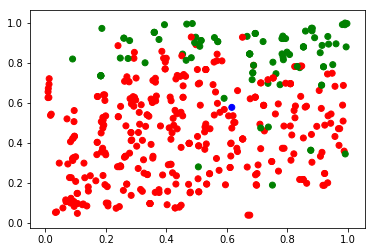

In [41]:
plt.scatter(text_sim, uast_sim, c=egor_answer)

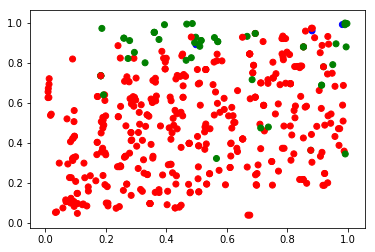

In [42]:
plt.scatter(text_sim, uast_sim, c=gabor_answer)

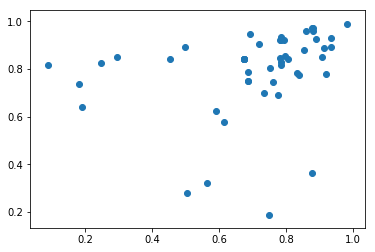

In [44]:
pairs = [i for i, (ea, ga) in enumerate(zip(egor_answer, gabor_answer)) if ea != ga]

plt.scatter(text_sim[pairs], uast_sim[pairs])    

In [45]:
len(pairs)

50

In [46]:
pairs

[3,
 5,
 9,
 12,
 18,
 26,
 30,
 40,
 47,
 52,
 65,
 77,
 79,
 80,
 86,
 87,
 124,
 151,
 160,
 164,
 166,
 168,
 188,
 193,
 195,
 205,
 214,
 221,
 224,
 225,
 236,
 243,
 256,
 263,
 268,
 272,
 273,
 280,
 308,
 326,
 330,
 343,
 361,
 370,
 373,
 388,
 399,
 401,
 404,
 423]